# PREDICTING THE PRICES OF HOWS IN BOSTON

###  The goal is to be able to make a price prediction of a house and to determine the factors on which the price depends. This can be achieved by the following steps:
###   1. Data Collection
###   2. Data Processing And Cleaning
###   3. Visualization
###   4. Model Training
###   5. Evaluation Of Trained Model

# Importing Of Data Analysis And Data Visualization Packages
###  - Pandas for data munging
###  - Numpy for linear algebraic operations and handling arrays
###  - Matplotlib for data visualizations
###  - Seaborn works together with Matplotlib for visualizations


In [16]:
#Import of Data Analysis packages
import pandas as pd
import numpy as np
#Import of Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data Collection

## 1.1 Loading The Data                                                                                                                 
### sklearn.datasets package embeds small toy datasets and also features helpers to fetch larger datasets commonly used by the macLoad and return the boston house-prices datasethine learning community. This dataset is of U.S Census Service concerning housing in the area of Boston Mass

In [51]:
#Importing load_boston from the sklearn.dataset library
from sklearn.datasets import load_boston
#loading the dataset using as boston using the load_boston function
boston = load_boston()

## 1.2 Understanding The Data
### The DESCR method provides the characteristics of the Boston dataset and all the attributes that it entails. Applying the DESCR on the boston data enlighten us to know all the information that comes with the dataset

In [18]:
#Describing the various constituents of the data and what is means
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### The feature_names method shows the feature names of all the columns that the dataset has. It shows the feature names of all the columns of the Boston dataset as an array in the same way they are actually arranged

In [52]:
#Showing the names of the columns
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
#Giving the overall information about the dataset including the data and the targets
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 1.3 Creating And Manipulating DataFrame

### DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. It is a function of the pandas library that helps in the creation of dataframes

In [21]:
#Creating a dataframe and giving the names of the columns to be the feature names of the Boston dataset
df=pd.DataFrame(boston.data, columns=boston.feature_names)

### The head function is used to get the first n rows. If no number is specified, it gives the first 5 rows. 

In [22]:
#Displaying the first 5 rows.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### From the boston.DESCR code, the column MEDV failed to appear when we called the head function. Calling the boston.target display the label data or target data which is the prices of the houses.

In [23]:
#Adding the target data to the dataframe and creating new column named MEDV
df['MEDV']=boston.target

In [24]:
#Showing the first 5 rows of the updated dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 2. Data Processing And Cleaning

## 2.1 Checking Information And Summary Of Data

### The info function when called on a pandas dataframe gives a concise summary of the data. Hence this code prints out the general information about the data including: index dtypes and column dtypes, memory usage and non-null values

In [53]:
#Displaying informative summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


### The describe function when called gives more information about the statistical values of the numerical columns of the dataframe. This code gives the percentile, mean and std of the numerical values of DataFrame. It analyses DataFrame column sets of mixed data types.

In [26]:
#Displaying statistical values of numerical columns
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3. Visualization

## 3.1 Visualization Of Columns Using PairPlot 

### The pairplot function of the seaborn package plot pairwise relationships in a dataset. It will create a grid of axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column

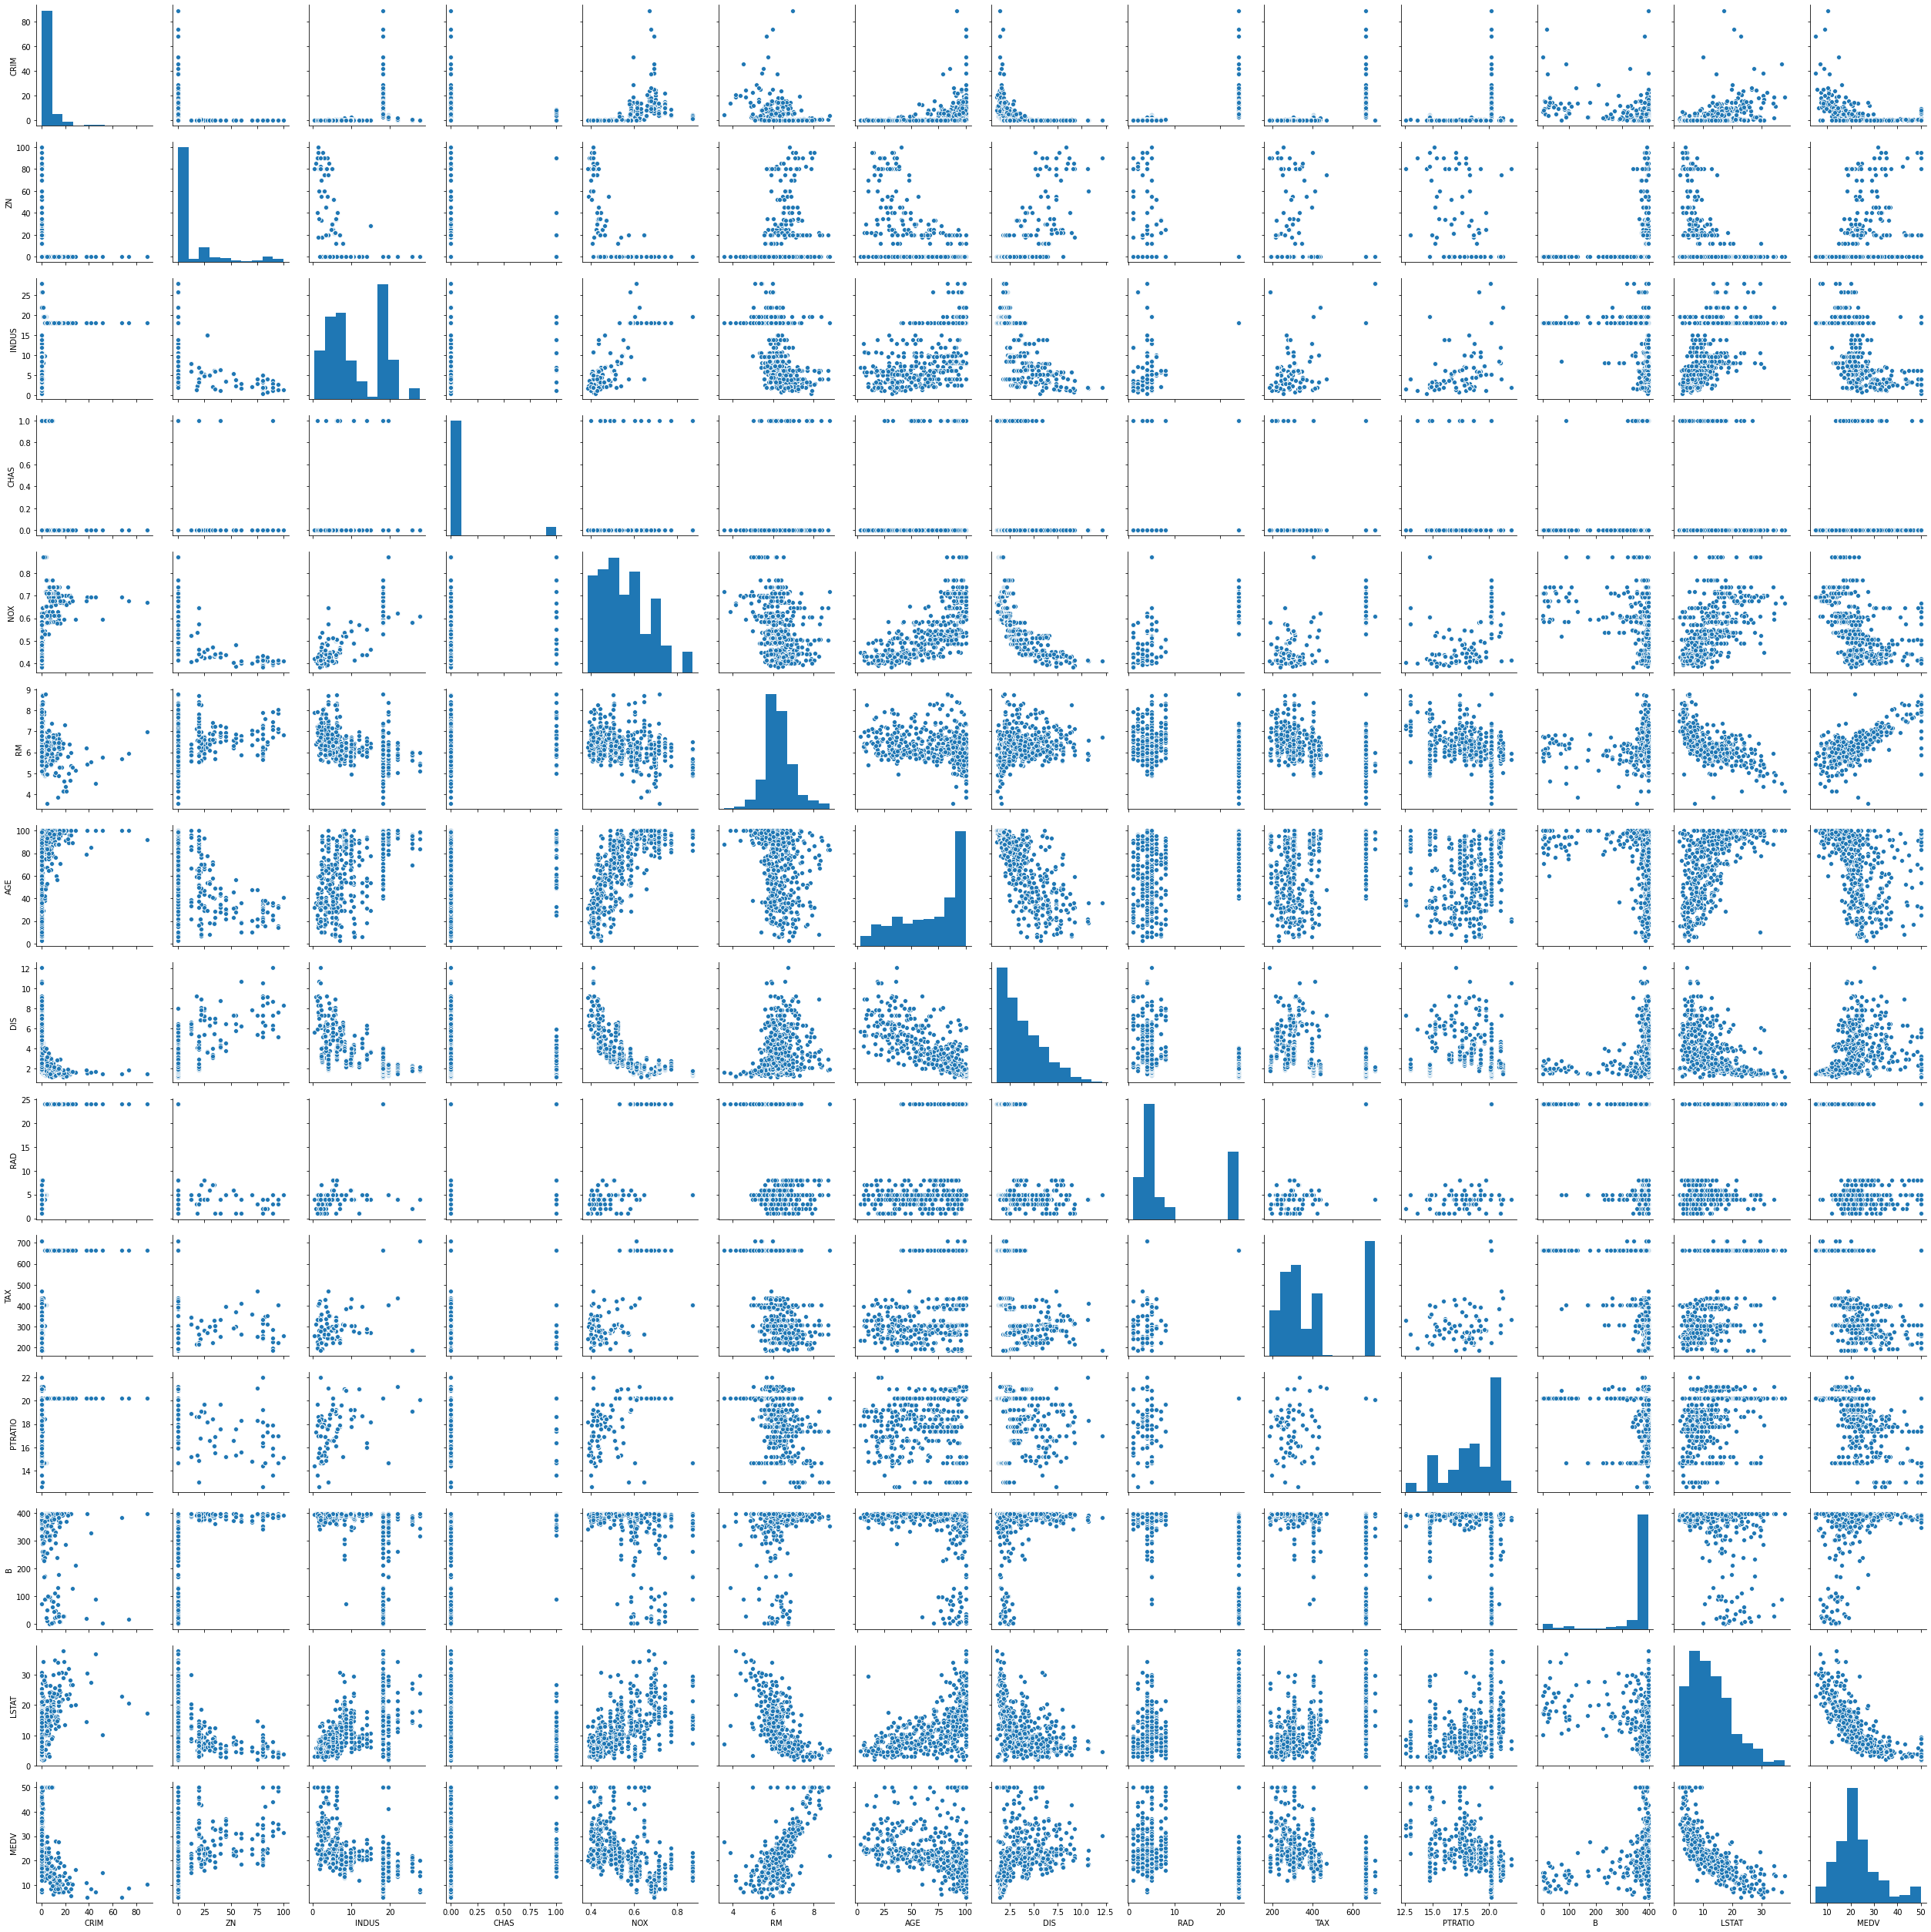

In [27]:
#Visualization using pairwise relationship with pairplot
sns.pairplot(df)

## 3.2 Visualization Of Columns Using DisPlot

### Plotting observations of the attributes using distplot to look the distribution of each columns. This will eneble as to know the variations and the standard deviation

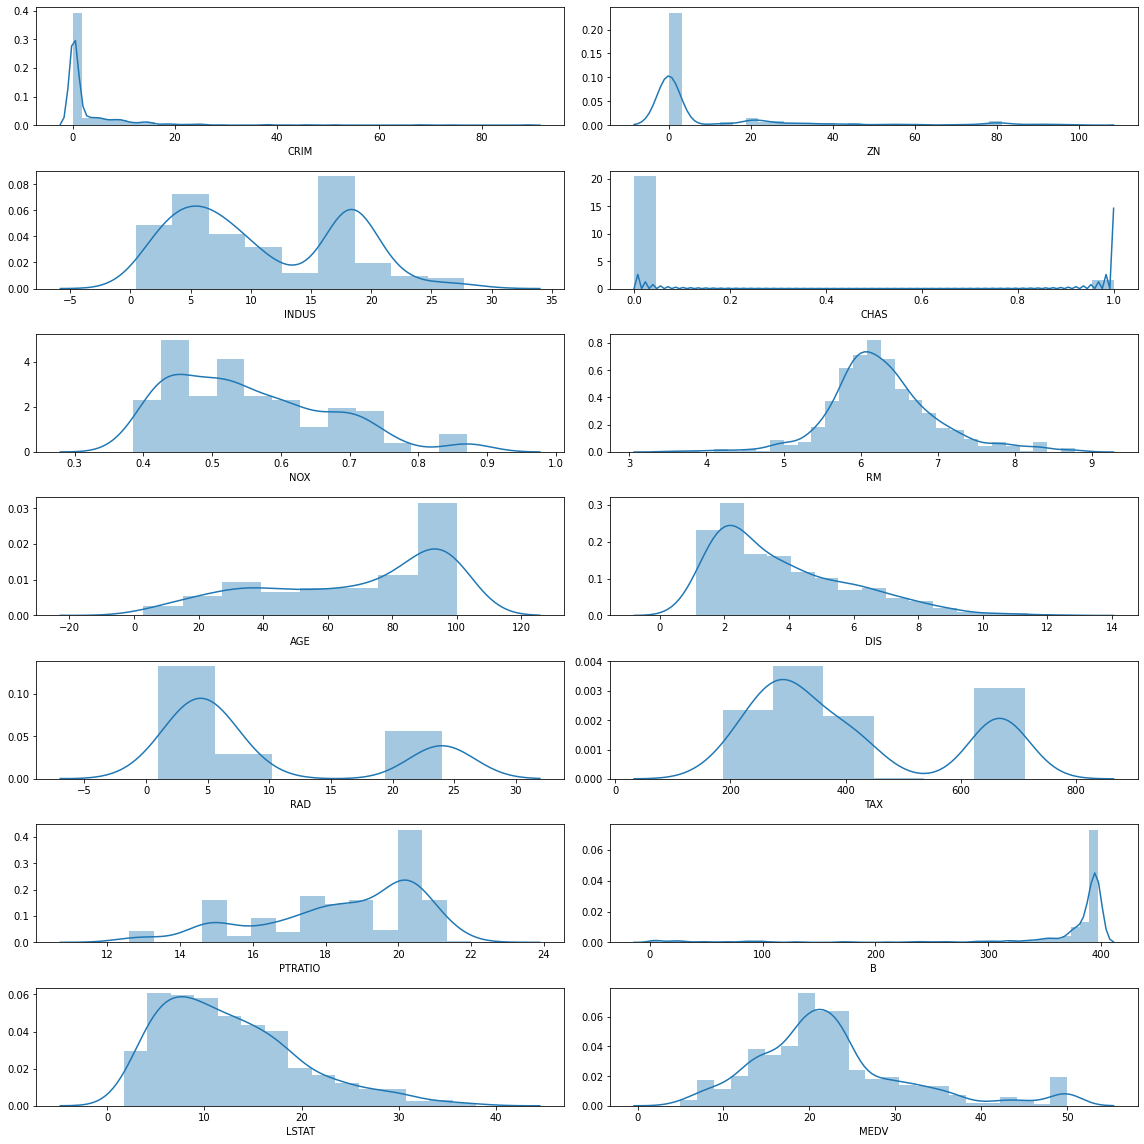

In [28]:
#Assigning values to rows and cols variables
rows=7
cols=2
#Creating subplot with a grid of 7 rows and 2 columns with each subplot having a figure size of 16,16
fig, ax=plt.subplots(nrows=rows, ncols=cols, figsize=(16,16))
#Setting the col variable to a list of the feature names of the columns of the Boston dataframe.
col=df.columns
#Initializing index with a value of 0
index=0
#Creating a loop to run through the rows and the columns of the subplot and create the needed distribution graph at the various axis of the grid
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index=index+1
#Giving an automatic adjustment of subplot parameters to give specified padding
plt.tight_layout()

## 3.3 Checking Correlation Using Heatmap
### There are three basic type of correlation:
### - Positive Correlation 
### - Negative Correlation
### - No correlation
### Correlation near 1 yield positive correlation and -1 indicate negative correlation. The aim is to get correlation near 1 or -1.

### From the heatmap, it can be seen that MEDV is better correlated with RM and LSTAT. RM having a positive correlation of 0.7 and LSTAT having a negative correlation of -0.74

<AxesSubplot:>

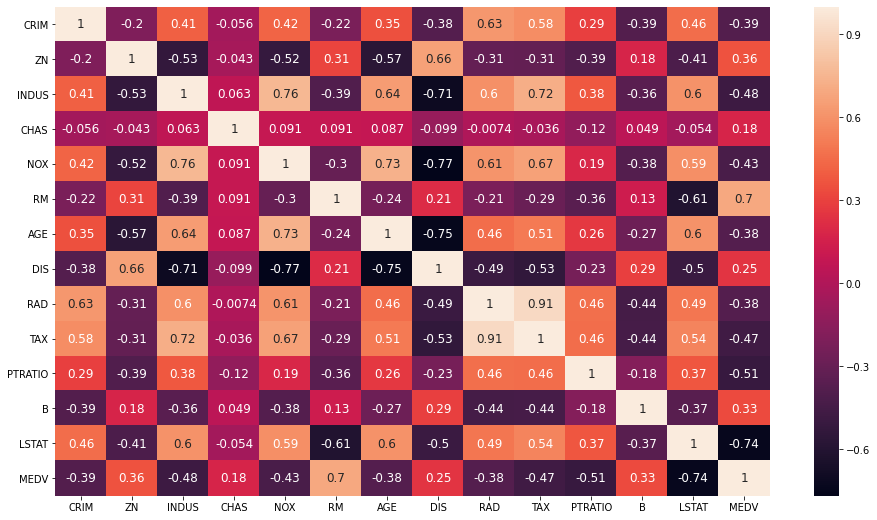

In [46]:
#Create a figure with size 16,9 and only a single subplot
fig, ax=plt.subplots(figsize=(16,9))
#To show the pairwise correlations of all columns in the dataframe.
sns.heatmap(df.corr(), annot=True, annot_kws={'size':12})

# 4. Model Training

## 4.1 Establishing Columns Of Higher Correlation

In [30]:
#Function to show the correlation between other columns and the MEDV column using a specified threshold.
def getCorrelatedFeature(corrdata, threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        #Condition to append the value if it is greater than the threshold
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df=pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    return df


In [31]:
#Specifying the threshold
threshold=0.4
#Calling the function and saving the output into the variable corr_value
corr_value=getCorrelatedFeature(df.corr()['MEDV'], threshold)

In [32]:
#Displaying the feature names of the columns that have a threshold of more than 0.4 as an array
corr_value.index.values

array(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype=object)

In [33]:
#Creating dataframe that contains the filter correlated columns
correlated_data=df[corr_value.index]
#Displaying the first 5 rows of the filter correlated columns
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [34]:
#Dropping the MEDV column and assigning the rest to X
X=correlated_data.drop(labels=['MEDV'], axis=1)
#Since MEDV is the value to be predicted, it is made the output and assigned y
y=correlated_data['MEDV']

## 4.2 Data Splitting

### Splitting the data into train set and test set where test set forms 33% of the total dataset. It was split using the train_test_split function from sklearn.model_selection

In [35]:
#Importing train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
#Splitting of data into train set and test set where the test data size is 0.33 of the total dataset
#The train set consists of X_train and y_train
#The test set consists of X_test and y_test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=1)

## 4.3 Creation Of Model Instance

### Importing the LinearRegression function and creating an instance as lm

In [36]:
#Importing the LinearRegression function from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression
#Initializing a linear regression model as lm
lm=LinearRegression()

### Training the model with the train data set using the fit function of LinearRegression

In [37]:
#Fitting the model with the train data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Making Predictions with the predict function of LinearRegression

In [49]:
#Making predictions with the model
#Given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model. predict(X_new) ), and returns the learned label for each object in the array.
predictions=lm.predict(X_test)

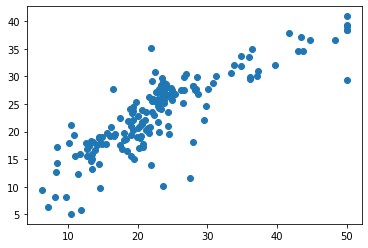

In [39]:
#Scatter plot of y_test array with the predictions array obtained from using the predict function of the model
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='MEDV'>

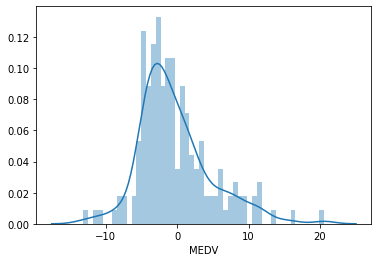

In [40]:
sns.distplot((y_test-predictions),bins=50)

## Results

### Taking into consideration the equation of a straight line y = c + mx
###  y = dependent variable
###  x = independent variable
###  c= y-intercept
###  m= coefficient of the linear regression

In [41]:
#The y intercept of the best fit regression line
lm.intercept_

23.49923705354484

In [42]:
#Displaying the best coefficient values
lm.coef_

array([ 1.08016127e-01, -7.91996313e+00,  4.30011673e+00, -2.02636592e-04,
       -9.66142294e-01, -5.36384366e-01])

# 5. Evaluation Of Trained Model

### Creation of a linear regression function with the intercept and the coefficient values known we can use to define a simple linear regression to compute the various values of y using x. The function takes 3 arguments which the x values, coefficient values and the y-intercept of the regression line.

In [43]:
#Linear regression function to give the values of y using x
def lin_func(values, coefficients=lm.coef_, y_axis=lm.intercept_):
    return np.dot(values, coefficients)+y_axis

### The code below prints the predicted values and the actual values we computed, the difference between the actual and predicted values so as to see the error between the predicted and the real values.

In [54]:
#Importing randint function from the random library
from random import randint
#Loop for checking how right the prediction is using random integers
for i in range(5):
    index=randint(0,len(df)-1)
    sample=df.iloc[index][corr_value.index.values].drop('MEDV')
    print(
        #Predicted value
        'PREDICTION:',round(lin_func(sample),2),
        #Real value 
        '// REAL:',df.iloc[index]['MEDV'],
        #Difference to find the error in prediction
        '// DIFFERENCE:',round(round(lin_func(sample),2)-df.iloc[index]['MEDV'],2)
    )

PREDICTION: 29.25 // REAL: 23.7 // DIFFERENCE: 5.55
PREDICTION: 20.7 // REAL: 20.7 // DIFFERENCE: 0.0
PREDICTION: 35.81 // REAL: 42.8 // DIFFERENCE: -6.99
PREDICTION: 24.73 // REAL: 15.0 // DIFFERENCE: 9.73
PREDICTION: 24.75 // REAL: 24.5 // DIFFERENCE: 0.25
